In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import Adam


from utils import CustomResNet
from utils import CustomResNetDropBlock
from utils import CustomResNetStoDepth
from utils import fashionmnist_dataloader
from utils import train_cutmix
from utils import val

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
np.random.seed(0)

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [ ]:
train_loader, val_loader, test_loader = fashionmnist_dataloader(batch_size=50, basic_aug=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 18109257.97it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275865.42it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5043240.10it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10721090.86it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16994310.91it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273182.60it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5096316.17it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 29457403.81it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
best_p_db = 0.1
best_p_sd = 0.1

In [ ]:
# Train DropBlock Model with optimal hyperparameters
num_classes = 10
num_epochs=10
criterion = nn.CrossEntropyLoss()
patience = 3

print(f"Training DropBlock model")
model_dropblock = CustomResNetDropBlock(num_classes, best_p_db, 7).to(device)
optimizer = Adam(model_dropblock.parameters(), lr=3e-4)

validation_accuracies = []
best_val_acc= float('-inf')
current_patience = 0

for epoch in range(1, num_epochs + 1):
    train_cutmix(model_dropblock, criterion, train_loader, optimizer, epoch, alpha=2.5, device=device)
    val_acc, avg_loss = val(model_dropblock, criterion, test_loader, device)
    validation_accuracies.append(val_acc)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        current_patience = 0
    else:
        current_patience += 1

    if current_patience >= patience:
        print(f'Early stopping: No improvement for {patience} epochs.')
        break

Training DropBlock model


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 200MB/s]


Train Epoch: 1	Average Loss: 0.705611	Accuracy: 74.61%
Val Loss: 0.3468, Val Accuracy: 87.50%
Train Epoch: 2	Average Loss: 0.496943	Accuracy: 82.24%
Val Loss: 0.3946, Val Accuracy: 85.36%
Train Epoch: 3	Average Loss: 0.438866	Accuracy: 84.37%
Val Loss: 0.2690, Val Accuracy: 90.04%
Train Epoch: 4	Average Loss: 0.414748	Accuracy: 85.16%
Val Loss: 0.2460, Val Accuracy: 91.23%
Train Epoch: 5	Average Loss: 0.392960	Accuracy: 86.00%
Val Loss: 0.2481, Val Accuracy: 91.35%
Train Epoch: 6	Average Loss: 0.370411	Accuracy: 86.61%
Val Loss: 0.2352, Val Accuracy: 91.70%
Train Epoch: 7	Average Loss: 0.355103	Accuracy: 87.22%
Val Loss: 0.2263, Val Accuracy: 92.33%
Train Epoch: 8	Average Loss: 0.330536	Accuracy: 88.16%
Val Loss: 0.2333, Val Accuracy: 92.04%
Train Epoch: 9	Average Loss: 0.323376	Accuracy: 88.42%
Val Loss: 0.2861, Val Accuracy: 90.58%
Train Epoch: 10	Average Loss: 0.307409	Accuracy: 88.90%
Val Loss: 0.2212, Val Accuracy: 92.79%


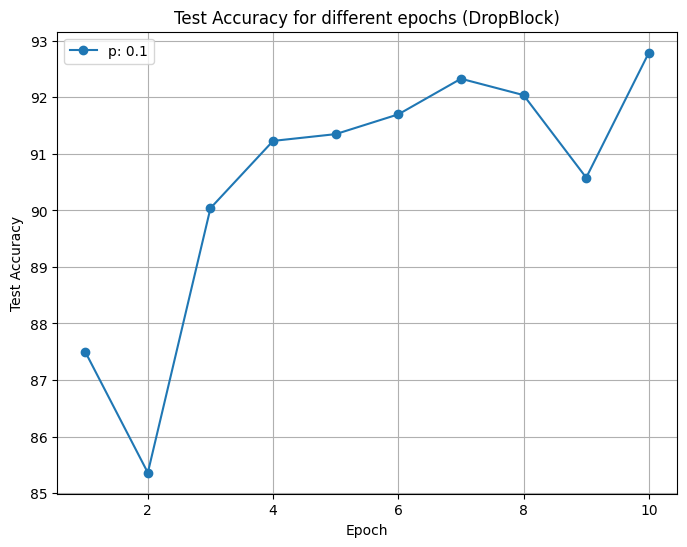

In [ ]:
# Create a single figure to hold the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, marker='o', label=f'p: {best_p_db}')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for different epochs (DropBlock)')
plt.legend(loc='best')
plt.grid()

# Show the single graph with all the data
plt.show()


In [ ]:
# Train StoDepth Model with optimal hyperparameters
num_classes = 10
num_epochs=10
criterion = nn.CrossEntropyLoss()
patience = 3

print(f"Training StoDepth model")
model_stodepth = CustomResNetStoDepth(num_classes, best_p_sd, "batch").to(device)
optimizer = Adam(model_stodepth.parameters(), lr=3e-4)

validation_accuracies = []
best_val_acc= float('-inf')
current_patience = 0

for epoch in range(1, num_epochs + 1):
    train_cutmix(model_stodepth, criterion, train_loader, optimizer, epoch, alpha=2.5, device=device)
    val_acc, avg_loss = val(model_stodepth, criterion, test_loader, device)
    validation_accuracies.append(val_acc)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        current_patience = 0
    else:
        current_patience += 1

    if current_patience >= patience:
        print(f'Early stopping: No improvement for {patience} epochs.')
        break

Training StoDepth model
Train Epoch: 1	Average Loss: 0.786189	Accuracy: 72.41%
Val Loss: 0.9285, Val Accuracy: 75.35%
Train Epoch: 2	Average Loss: 0.558815	Accuracy: 80.51%
Val Loss: 0.8102, Val Accuracy: 78.18%
Train Epoch: 3	Average Loss: 0.493527	Accuracy: 82.70%
Val Loss: 0.9299, Val Accuracy: 77.68%
Train Epoch: 4	Average Loss: 0.457670	Accuracy: 83.89%
Val Loss: 1.0951, Val Accuracy: 78.24%
Train Epoch: 5	Average Loss: 0.439268	Accuracy: 84.66%
Val Loss: 0.6370, Val Accuracy: 82.47%
Train Epoch: 6	Average Loss: 0.408025	Accuracy: 85.60%
Val Loss: 0.7693, Val Accuracy: 82.81%
Train Epoch: 7	Average Loss: 0.391573	Accuracy: 86.09%
Val Loss: 0.6833, Val Accuracy: 80.81%
Train Epoch: 8	Average Loss: 0.372956	Accuracy: 86.96%
Val Loss: 0.6800, Val Accuracy: 83.60%
Train Epoch: 9	Average Loss: 0.369069	Accuracy: 86.92%
Val Loss: 0.6375, Val Accuracy: 83.65%
Train Epoch: 10	Average Loss: 0.350175	Accuracy: 87.67%
Val Loss: 0.5984, Val Accuracy: 81.50%


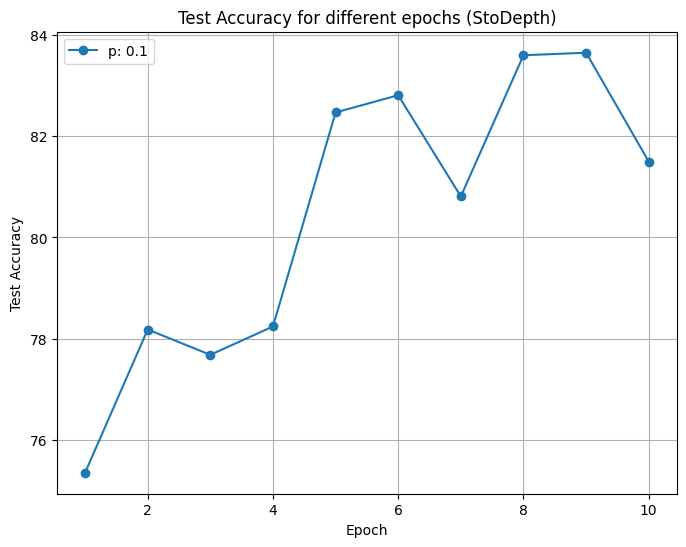

In [ ]:
# Create a single figure to hold the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, marker='o', label=f'p: {best_p_sd}')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for different epochs (StoDepth)')
plt.legend(loc='best')
plt.grid()

# Show the single graph with all the data
plt.show()
